This notebook will be updated regularly at
https://github.com/rachelss/BigDataAnalysis/blob/gh-pages/Class_April4.ipynb

In [ ]:
a = 'a'
a = 'b'  #this is a string
b = 1  #this is an int
c = [1,2,3] #this is a list
d = {'a':1,'b':1}

In [ ]:
a = [1,3,5,9,10,2,4]
print(a)

In [ ]:
b = sorted(a) #assigning output of function to new object
print(b)

In [ ]:
a = [1,3,5,9,10,2,4]
a = sorted(a)  #reassign sorted to a
print(a)

In [ ]:
a = [1,3,5,9,10,2,4]
a.sort()
print(a)

In [ ]:
a = [1,3,5,9,10,2,4]
a.append(6)
print(a)

In [ ]:
a = [1,3,5,9,10,2,4]
b = a
a.sort()
print(a)

In [ ]:
print(b)

In [ ]:
a = [1,3,5,9,10,2,4]
b = list(a)
b = a[:]
a.sort()
print(a)
print(b)

In [ ]:
a.append(15)
print(a)

In [ ]:
a.pop()
print(a)

In [ ]:
a.pop(0)
print(a)

In [ ]:
a.reverse()
print(a)

In [ ]:
type(a)

In [ ]:
b = 'hello'
list(b)

In [ ]:
c = 15
c = str(c)
print(c)

In [ ]:
type(c)

In [ ]:
int(c)

In [ ]:
type(c)

In [ ]:
c = int(c)
type(c)

In [ ]:
#list to string
print(b)
','.join(b)

In [4]:
import pandas as pd
#might need to install
#conda install pandas

download data using command line curl

!curl -O https://raw.githubusercontent.com/mperignon/python-lessons/gh-pages/data/surveys.csv

In [5]:
survey = pd.read_csv('surveys.csv')

In [ ]:
survey

In [ ]:
print(type(survey))
print(survey.dtypes)

### Challenge

In [ ]:
survey.columns # prints col names w type
survey.head()  # print first 5 rows
survey.head(15) # print first rows specified
survey.tail() # print last 5 rows
survey.shape # dimensions of data

What do the above do and why do some have () and others don't?
() indicate functions
no () indicate attributes

In [ ]:
survey.columns

In [ ]:
#access species column in data
survey.species

In [ ]:
print(type(survey.species))

In [ ]:
#unique values of a column
pd.unique(survey.species)

In [ ]:
survey.species.unique()

In [ ]:
survey['species'].unique()

In [ ]:
type(survey['species'].unique())

In [ ]:
survey['wgt'].describe()

In [ ]:
print(survey['wgt'].min())
survey['wgt'].max()
survey['wgt'].mean()
survey['wgt'].std()
survey['wgt'].count()

In [ ]:
#group by sex
#then calculate summary stat
survey_by_sex = survey.groupby('sex')
survey_by_sex.mean()

In [ ]:
survey.groupby('sex').mean()

### Challenge

In [ ]:
#the number of records that have sex = Z,P,R

#take the mean of groups when grouped by ['plot','sex']

#summary stats for weight for each plot

In [ ]:
sp_counts = survey.groupby('species').record_id.count()

In [ ]:
sp_counts.head()

In [ ]:
survey['wgt']*0.0001

In [ ]:
%matplotlib inline

#plot num of each species
sp_counts.plot(kind = 'bar')

In [ ]:
#num of species in each plot
sp_plot = survey.groupby('plot').species.nunique()
sp_plot.plot(kind='bar')

### Challenge

* plot the average weight of all individuals in a plot

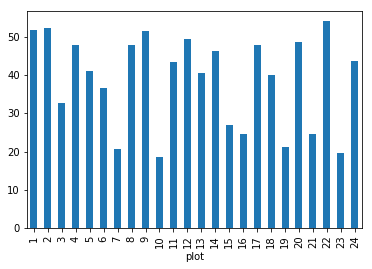

In [27]:
#given data, separate data for each plot, take the mean of the weight
#for each set of plot data
mean_w = survey.groupby('plot').wgt.mean()
mean_w.plot(kind = 'bar')

In [28]:
#number of individuals per species per plot
#think stacked bar plot

sp_plot = survey.groupby(['species','plot'], 
                         as_index = False).record_id.count()

In [ ]:
sp_plot.head()

In [29]:
sp_plot_wide = sp_plot.pivot(index = 'plot', columns = 'species', 
                             values = 'record_id')

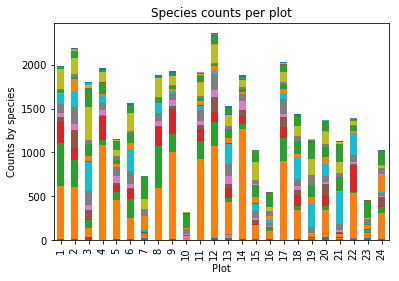

In [30]:
my_plot = sp_plot_wide.plot(kind = 'bar', stacked = True, legend = False, 
                  title = "Species counts per plot")
my_plot.set_xlabel("Plot")
my_plot.set_ylabel("Counts by species")

In [ ]:
survey_copy = survey.copy()
survey_copy[0:3] = 0
survey_copy.head()

In [ ]:
survey[44:49]

In [ ]:
survey.iloc[0:3,3:4]

In [ ]:
survey.loc[[0,10],:]

In [ ]:
survey.loc[0:3,['species','year']]

In [ ]:
survey[survey.year ==2001]
survey[survey.year != 2001]
survey[(survey.year > 1980) & (survey.year <1986)]

### Challenge

* How many samples contain data from 1999 and have weight less that or equal to 8

* How many samples have sex Z, R, and P?
hint: use the `isin` method: df[df['colname'].isin(mylist)]

* Find rows where the sample is not male or female

hint: len() counts the number of items in a list or the number of rows in a dataframe

In [ ]:
len(survey[(survey.year == 1999) & (survey.wgt <=8)])

In [ ]:
len(survey[(survey.sex == 'Z')| (survey.sex == 'R')| (survey.sex == 'P')])

In [ ]:
survey[(survey.sex != 'M') & (survey.sex != 'F')]

In [ ]:
pd.isnull(survey).head()

In [ ]:
survey_nan = pd.isnull(survey)
survey[survey_nan.any(axis=1)].head()

In [ ]:
weight_null = survey[survey.wgt.isnull()]

In [ ]:
weight_null.to_csv('survey_weight_null.csv')

### Challenge

Write files for each survey year separately

hint: use a loop to go through your list of years

In [ ]:
#get the list of years
years = survey.year.unique()
#go through the list
for year in years:
    #filter data for that year
    year_data = survey[survey.year == year]
    #write filtered data to an appropriate filename
    #hint: to make a single string out of several items use
    # 'somestring' + str(some_int) + 'someotherstring
    year_data.to_csv('survey_'+str(year)+'.csv')

In [6]:
survey.head()

,record_id,month,day,year,plot,species,sex,wgt
0,1,7,16,1977,2,NaN,M,NaN
1,2,7,16,1977,3,NaN,M,NaN
2,3,7,16,1977,2,DM,F,NaN
3,4,7,16,1977,7,DM,M,NaN
4,5,7,16,1977,3,DM,M,NaN


In [7]:
!curl -O https://raw.githubusercontent.com/mperignon/python-lessons/gh-pages/data/species.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2107  100  2107    0     0   1220      0  0:00:01  0:00:01 --:--:-- 21282


In [8]:
spp = pd.read_csv('species.csv',keep_default_na=False, na_values=[""])

In [9]:
survey = pd.read_csv('surveys.csv',keep_default_na=False, na_values=[""])

In [10]:
survey.columns

Index(['record_id', 'month', 'day', 'year', 'plot', 'species', 'sex', 'wgt'], dtype='object')

In [11]:
spp.columns

Index(['species_id', 'genus', 'species', 'taxa'], dtype='object')

In [12]:
survey.species.unique()

array(['NA', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [13]:
spp.species_id.unique()

array(['AB', 'AH', 'AS', 'BA', 'CB', 'CM', 'CQ', 'CS', 'CT', 'CU', 'CV',
       'DM', 'DO', 'DS', 'DX', 'EO', 'GS', 'NA', 'NX', 'OL', 'OT', 'OX',
       'PB', 'PC', 'PE', 'PF', 'PG', 'PH', 'PI', 'PL', 'PM', 'PP', 'PU',
       'PX', 'RF', 'RM', 'RO', 'RX', 'SA', 'SB', 'SC', 'SF', 'SH', 'SO',
       'SS', 'ST', 'SU', 'SX', 'UL', 'UP', 'UR', 'US', 'XX', 'ZL', 'ZM'], dtype=object)

In [21]:
#join datasets given spp - species_id and survey - species
#left join - keep all survey data - add species info if known
merged_left = pd.merge(left = survey, right = spp, left_on = 'species',
                       right_on = 'species_id',how = 'left')

In [17]:
merged_left.head()

,record_id,month,day,year,plot,species_x,sex,wgt,species_id,genus,species_y,taxa
0,1,7,16,1977,2,NA,M,NaN,NA,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NA,M,NaN,NA,Neotoma,albigula,Rodent
2,3,7,16,1977,2,DM,F,NaN,DM,Dipodomys,merriami,Rodent
3,4,7,16,1977,7,DM,M,NaN,DM,Dipodomys,merriami,Rodent
4,5,7,16,1977,3,DM,M,NaN,DM,Dipodomys,merriami,Rodent


In [22]:
#inner join - same as left but don't keep unknowns
merged_inner = pd.merge(left = survey, right = spp, left_on = 'species',
                       right_on = 'species_id')

In [19]:
merged_inner.head()

,record_id,month,day,year,plot,species_x,sex,wgt,species_id,genus,species_y,taxa
0,1,7,16,1977,2,NA,M,NaN,NA,Neotoma,albigula,Rodent
1,2,7,16,1977,3,NA,M,NaN,NA,Neotoma,albigula,Rodent
2,22,7,17,1977,15,NA,F,NaN,NA,Neotoma,albigula,Rodent
3,38,7,17,1977,17,NA,M,NaN,NA,Neotoma,albigula,Rodent
4,72,8,19,1977,2,NA,M,NaN,NA,Neotoma,albigula,Rodent


In [23]:
merged_full = pd.merge(left = survey, right = spp, left_on = 'species',
                       right_on = 'species_id',how = 'outer')

### Challenge
* Plot number of each taxon by plot

get plot data: 
https://raw.githubusercontent.com/mperignon/python-lessons/gh-pages/data/plots.csv

* make separate plots for 'control' and 'rodent exclosure' data (hint: don't forget to join the new information with the data

In [26]:
%matplotlib inline

In [ ]:
#take merged data, get separate data by taxon & plot
taxon_plot = merged_left.groupby(['taxa','plot'], 
                         as_index = False).record_id.count()